In [378]:
import pandas as pd

In [379]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [380]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [381]:
import scipy.stats as stats

In [382]:
data=pd.read_excel('/Users/sahilsharma/Downloads/Strikers_performance.xlsx')
data.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct
0,1,Spain,Left-footed,No,17.483571,10.778533,34.795488,0.677836,0.166241,0.757061,50.921924,71.806409,15.682532,30.412215,6.152481,0.820314,0.922727,8.570370,11.451388
1,2,France,Left-footed,Yes,14.308678,13.728250,31.472436,0.544881,0.192774,0.796818,61.396150,53.726866,19.843983,26.474913,6.093172,0.803321,0.678984,3.444638,8.243689
2,3,Germany,Left-footed,No,18.238443,3.804297,25.417413,0.518180,0.160379,0.666869,65.863945,60.452227,20.090084,24.164116,3.408714,0.766540,0.843858,8.429491,9.506835
3,4,France,Right-footed,No,22.615149,9.688908,20.471443,0.599663,0.184602,0.638776,88.876877,60.511979,22.363152,44.129989,6.339820,0.611798,0.662997,6.532552,8.199653
4,5,France,Left-footed,Yes,13.829233,6.048072,29.887563,0.582982,0.105319,0.591485,75.565531,54.982158,13.165708,37.859323,8.465658,0.701638,0.906538,8.414915,6.665333


In [383]:
#Check for missing values within any column and use SimpleImputer to impute the missing values. Use strategy 'median' for numeric and 'most frequent' for nominal columns.

In [384]:
missing_data=data.isnull().sum()
missing_data

Striker_ID                    0
Nationality                   0
Footedness                    0
Marital Status                0
Goals Scored                  0
Assists                       0
Shots on Target               0
Shot Accuracy                 0
Conversion Rate               0
Dribbling Success             0
Movement off the Ball         6
Hold-up Play                  0
Aerial Duels Won              0
Defensive Contribution        0
Big Game Performance          2
Consistency                   0
Penalty Success Rate          5
Impact on Team Performance    0
Off-field Conduct             0
dtype: int64

In [385]:
from sklearn.impute import SimpleImputer

In [386]:
imputed_data = pd.DataFrame(data)

# Create an imputer object with the 'median' strategy
imputer = SimpleImputer(strategy='median')

# Fit the imputer on the 'Movement off the Ball' column and transform the data
data[['Movement off the Ball',]] = imputer.fit_transform(data[['Movement off the Ball']]) 
data[['Big Game Performance',]] = imputer.fit_transform(data[['Big Game Performance']]) 
data[['Penalty Success Rate',]] = imputer.fit_transform(data[['Penalty Success Rate']]) 






In [418]:

data.dtypes

Striker_ID                      int64
Nationality                    object
Footedness                     object
Marital Status                 object
Goals Scored                  float64
Assists                         int64
Shots on Target                 int64
Shot Accuracy                 float64
Conversion Rate               float64
Dribbling Success             float64
Movement off the Ball           int64
Hold-up Play                    int64
Aerial Duels Won                int64
Defensive Contribution          int64
Big Game Performance            int64
Consistency                   float64
Penalty Success Rate          float64
Impact on Team Performance      int64
Off-field Conduct               int64
dtype: object

In [388]:
#Check for the correct data types and assign integer data types for specific variables: 'Goals Scored', 'Assists', 'Shots on Target', 'Movement off the Ball', 'Hold-up Play', 'Aerial Duels Won', 'Defensive Contribution', 'Big Game Performance', 'Impact on Team Performance', 'Off-field Conduct'.

In [470]:
columns_to_change = ['Goals Scored', 'Assists', 'Shots on Target', 'Movement off the Ball',
                     'Hold-up Play', 'Aerial Duels Won', 'Defensive Contribution', 
                     'Big Game Performance', 'Impact on Team Performance', 'Off-field Conduct'
                    ] 
for column in columns_to_change:
    
    
    # Convert the column to integer type
    imputed_data[column] = imputed_data[column].astype(int) 


In [471]:
imputed_data.dtypes

Striker_ID                      int64
Nationality                    object
Footedness                      int64
Marital Status                  int64
Goals Scored                    int64
Assists                         int64
Shots on Target                 int64
Shot Accuracy                 float64
Conversion Rate               float64
Dribbling Success             float64
Movement off the Ball           int64
Hold-up Play                    int64
Aerial Duels Won                int64
Defensive Contribution          int64
Big Game Performance            int64
Consistency                   float64
Penalty Success Rate          float64
Impact on Team Performance      int64
Off-field Conduct               int64
Total contribution score      float64
dtype: object

In [472]:
round(imputed_data.describe(),2)

,Striker_ID,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total contribution score
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,495.00,500.00,500.00,500.00
mean,250.50,0.53,0.52,14.52,7.60,25.26,0.60,0.20,0.70,69.28,59.33,19.04,39.47,6.43,0.74,0.80,6.52,7.57,114.27
std,144.48,0.50,0.50,4.91,2.96,7.08,0.10,0.05,0.10,10.33,10.15,4.95,9.90,1.98,0.10,0.10,2.11,2.09,14.07
min,1.00,0.00,0.00,0.00,0.00,4.00,0.31,0.05,0.40,40.00,35.00,4.00,8.00,2.00,0.46,0.53,0.00,0.00,67.40
25%,125.75,0.00,0.00,11.00,6.00,20.00,0.54,0.17,0.64,62.00,52.00,16.00,33.00,5.00,0.68,0.72,5.00,6.00,105.71
50%,250.50,1.00,1.00,15.00,8.00,25.00,0.60,0.20,0.70,69.00,60.00,19.00,39.50,6.00,0.75,0.80,6.50,8.00,114.86
75%,375.25,1.00,1.00,18.00,9.00,30.00,0.67,0.23,0.76,76.00,66.00,22.00,46.00,8.00,0.81,0.87,8.00,9.00,122.84
max,500.00,1.00,1.00,34.00,15.00,43.00,0.92,0.36,1.00,98.00,92.00,34.00,71.00,12.00,1.00,1.00,13.00,13.00,158.25


In [473]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [474]:
import builtins
if 'plt' in globals():
    del plt
    import matplotlib.pyplot as plt


In [475]:
#Perform percentage analysis on the variable Footedness and create a pie chart on the output using matplotlib.

In [476]:
freq_Footedness=imputed_data['Footedness'].value_counts()
freq_Footedness

Footedness
1    267
0    233
Name: count, dtype: int64

In [477]:
perc_freq_Footedness=(freq_Footedness/len(imputed_data['Footedness']))*100
perc_freq_Footedness

Footedness
1    53.4
0    46.6
Name: count, dtype: float64

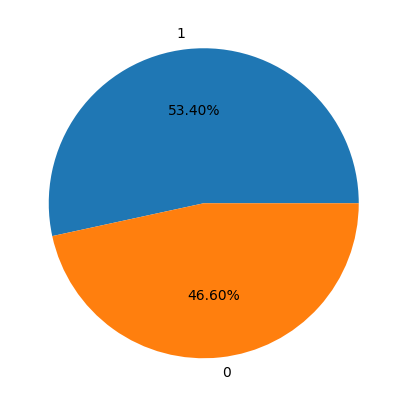

In [478]:
plt.figure(figsize=(5, 6))
perc_freq_Footedness.plot(kind='pie', autopct='%1.2f%%')
plt.ylabel('')
plt.show()

In [479]:
#Visualize the distribution of players' footedness across different nationalities in a countplot of seaborn

In [480]:
import seaborn as sns

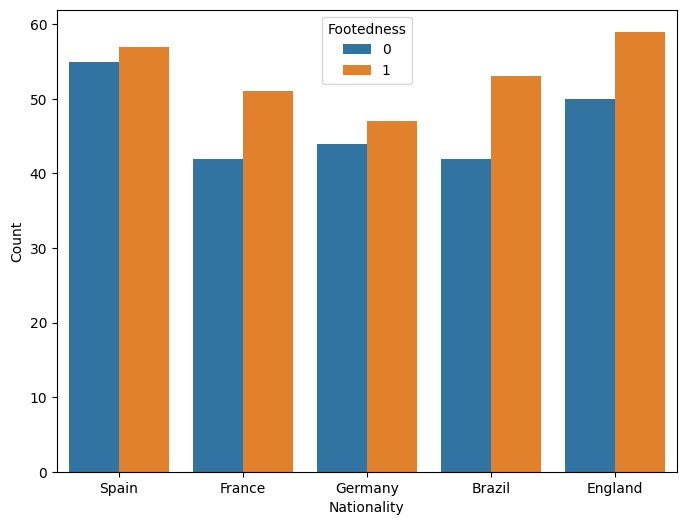

In [481]:
plt.figure(figsize=(8, 6))
sns.countplot(data=imputed_data, x='Nationality', hue='Footedness')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.show()

In [482]:
#Determine which nationality strikers have the highest average number of goals scored.

In [483]:
avg_goals_by_nationality=imputed_data.groupby('Nationality')['Goals Scored'].mean('asceding'==False)
avg_goals_by_nationality

Nationality
Brazil     15.315789
England    13.899083
France     14.408602
Germany    14.351648
Spain      14.687500
Name: Goals Scored, dtype: float64

In [484]:
#Calculate the average conversion rate for players based on their footedness

In [485]:
avg_conversion_by_footedness=imputed_data.groupby('Footedness')['Conversion Rate'].mean('ascending'==False)
avg_conversion_by_footedness

Footedness
0    0.198086
1    0.200592
Name: Conversion Rate, dtype: float64

In [486]:
#Find whether there is any significant difference in consistency rates among strikers from various nationalities.
#Before doing the appropriate test, must check for the assumptions.

In [487]:
import scipy.stats as stats
from statsmodels.stats.anova import AnovaRM

In [488]:
## Visualize the distribution of consistency rates

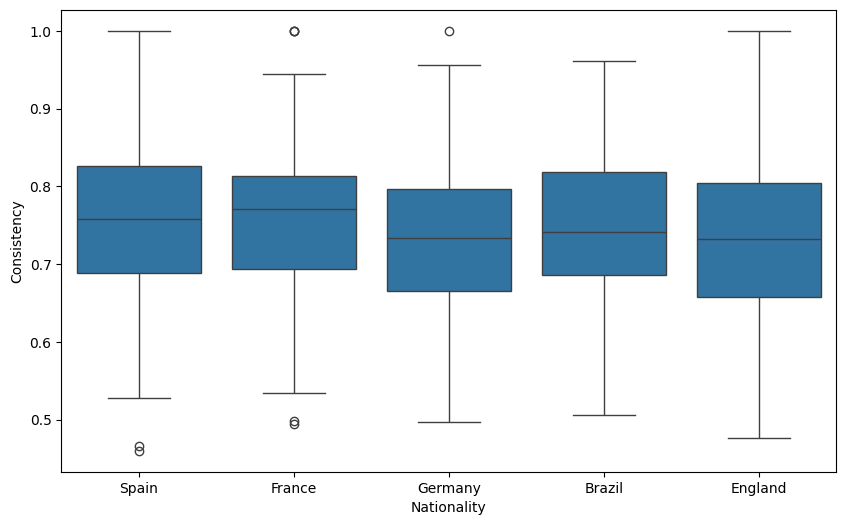

In [489]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Nationality', y='Consistency', data=imputed_data)
#plt.title('Distribution of Consistency Rates by Nationality')
plt.show()

In [490]:
# Check for normality assumption

In [491]:
normality_test_results=imputed_data.groupby('Nationality')['Consistency'].apply(stats.shapiro)
print("Normality Test Results:")
normality_test_results


Normality Test Results:


Nationality
Brazil        (0.990421776813989, 0.730289122427942)
England     (0.9952543679584248, 0.9730417417840104)
France     (0.9859183060298005, 0.42093946254177006)
Germany      (0.9941901586893278, 0.963621461584816)
Spain       (0.9904761541308212, 0.6272529723743321)
Name: Consistency, dtype: object

In [492]:
# Check for homogeneity of variances
#Levene's Test

In [493]:
levene_test = stats.levene(*[group['Consistency'].values for name, group in imputed_data.groupby('Nationality')])
print(f"Levene's Test for Homogeneity of Variances: {levene_test}")

Levene's Test for Homogeneity of Variances: LeveneResult(statistic=0.40038650984072066, pvalue=0.8083990350934653)


In [494]:
#perforing ANOVA

In [495]:
anova_result = stats.f_oneway(*[group['Consistency'].values for name, group in imputed_data.groupby('Nationality')])
print(f"ANOVA Result: {anova_result}")

ANOVA Result: F_onewayResult(statistic=1.527898429363593, pvalue=0.1927867590159922)


In [496]:
#Check if there is any significant correlation between strikers' Hold-up play and consistency rate.
#Must check for the assumptions.

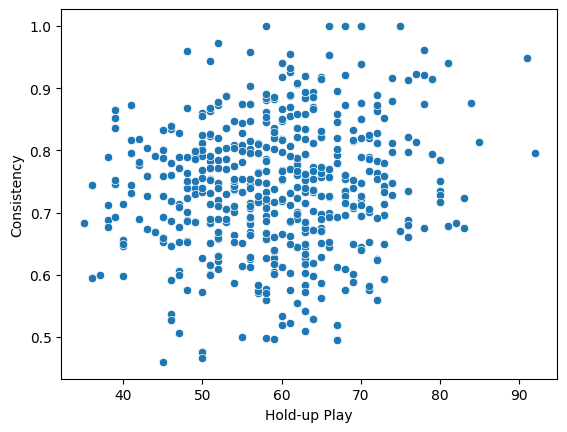

In [497]:
sns.scatterplot(x='Hold-up Play', y='Consistency', data=imputed_data)
#plt.title('Scatterplot of Hold-up Play vs Consistency Rate')
plt.show()

In [498]:
# Check for normality of the variables

In [499]:
shapiro_hold_up = stats.shapiro(imputed_data['Hold-up Play'])
shapiro_consistency = stats.shapiro(imputed_data['Consistency'])
print(f"Shapiro-Wilk Test for Hold-up Play: {shapiro_hold_up}")
print(f"Shapiro-Wilk Test for Consistency Rate: {shapiro_consistency}")

Shapiro-Wilk Test for Hold-up Play: ShapiroResult(statistic=0.9954325275369147, pvalue=0.15094090394131476)
Shapiro-Wilk Test for Consistency Rate: ShapiroResult(statistic=0.9968719443391267, pvalue=0.4512769941459281)


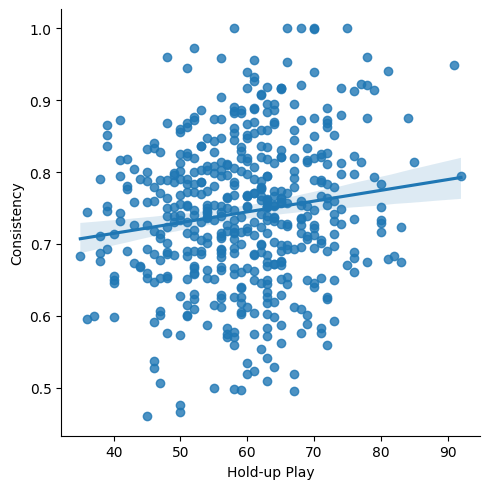

In [500]:
# Check for linearity assumption
sns.lmplot(x='Hold-up Play', y='Consistency', data=imputed_data)
#plt.title('Linearity Check with Linear Fit')
plt.show()

In [501]:
from scipy import stats

In [502]:
correaltion=stats.pearsonr(imputed_data['Hold-up Play'],imputed_data['Consistency'])
correaltion

PearsonRResult(statistic=0.1465457328355414, pvalue=0.0010146963053631072)

In [503]:
#Check if strikers' hold-up play significantly influences their consistency rate.


In [504]:
import statsmodels.api as sm

In [505]:
X = imputed_data['Hold-up Play']
y = imputed_data['Consistency']
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Consistency   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     10.93
Date:                Sat, 08 Jun 2024   Prob (F-statistic):            0.00101
Time:                        20:10:06   Log-Likelihood:                 429.97
No. Observations:                 500   AIC:                            -855.9
Df Residuals:                     498   BIC:                            -847.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.6548      0.027     24.031   

In [506]:
#Create a new feature - Total contribution score by summing up specific columns: 'Goals Scored', 'Assists', 'Shots on Target', 'Dribbling Success', 'Aerial Duels Won', 'Defensive Contribution', 'Big Game Performance', 'Consistency'.

In [507]:
columns_to_sum=['Goals Scored', 'Assists', 'Shots on Target', 'Dribbling Success',
                'Aerial Duels Won', 'Defensive Contribution', 'Big Game Performance', 
                'Consistency'
               ] 
for column in columns_to_sum:
    imputed_data['Total contribution score']=data[columns_to_sum].sum(axis=1)

In [508]:
imputed_data.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total contribution score
0,1,Spain,0,0,17,10,34,0.677836,0.166241,0.757061,50,71,15,30,6,0.820314,0.922727,8,11,114.060946
1,2,France,0,1,14,13,31,0.544881,0.192774,0.796818,61,53,19,26,6,0.803321,0.678984,3,8,110.908818
2,3,Germany,0,0,18,3,25,0.518180,0.160379,0.666869,65,60,20,24,3,0.766540,0.843858,8,9,94.671852
3,4,France,1,0,22,9,20,0.599663,0.184602,0.638776,88,60,22,44,6,0.611798,0.662997,6,8,124.865724
4,5,France,0,1,13,6,29,0.582982,0.105319,0.591485,75,54,13,37,8,0.701638,0.906538,8,6,108.122356


In [509]:
#footedness 0 for 'Left-footed' and 1 for 'Right-footed'

In [510]:
from sklearn.preprocessing import LabelEncoder

In [511]:
encoder=LabelEncoder()
imputed_data['Footedness']=encoder.fit_transform(imputed_data['Footedness'])
 
 
imputed_data['Marital Status']=encoder.fit_transform(imputed_data['Marital Status'])
imputed_data.head()


,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total contribution score
0,1,Spain,0,0,17,10,34,0.677836,0.166241,0.757061,50,71,15,30,6,0.820314,0.922727,8,11,114.060946
1,2,France,0,1,14,13,31,0.544881,0.192774,0.796818,61,53,19,26,6,0.803321,0.678984,3,8,110.908818
2,3,Germany,0,0,18,3,25,0.518180,0.160379,0.666869,65,60,20,24,3,0.766540,0.843858,8,9,94.671852
3,4,France,1,0,22,9,20,0.599663,0.184602,0.638776,88,60,22,44,6,0.611798,0.662997,6,8,124.865724
4,5,France,0,1,13,6,29,0.582982,0.105319,0.591485,75,54,13,37,8,0.701638,0.906538,8,6,108.122356


In [512]:
#creating dummies

In [513]:
dummy=pd.get_dummies(imputed_data['Nationality'])

In [514]:
for col in dummy.columns:
    dummy[col]=dummy[col].astype('int') 
    processed_data=pd.concat([imputed_data,dummy],axis=1)

In [515]:
processed_data.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,...,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total contribution score,Brazil,England,France,Germany,Spain
0,1,Spain,0,0,17,10,34,0.677836,0.166241,0.757061,...,0.820314,0.922727,8,11,114.060946,0,0,0,0,1
1,2,France,0,1,14,13,31,0.544881,0.192774,0.796818,...,0.803321,0.678984,3,8,110.908818,0,0,1,0,0
2,3,Germany,0,0,18,3,25,0.518180,0.160379,0.666869,...,0.766540,0.843858,8,9,94.671852,0,0,0,1,0
3,4,France,1,0,22,9,20,0.599663,0.184602,0.638776,...,0.611798,0.662997,6,8,124.865724,0,0,1,0,0
4,5,France,0,1,13,6,29,0.582982,0.105319,0.591485,...,0.701638,0.906538,8,6,108.122356,0,0,1,0,0


In [516]:
from sklearn.cluster import KMeans

In [517]:
features = processed_data.drop('Striker_ID', axis=1) 
features=features.drop('Nationality',axis=1)
features.head()


,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,...,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total contribution score,Brazil,England,France,Germany,Spain
0,0,0,17,10,34,0.677836,0.166241,0.757061,50,71,...,0.820314,0.922727,8,11,114.060946,0,0,0,0,1
1,0,1,14,13,31,0.544881,0.192774,0.796818,61,53,...,0.803321,0.678984,3,8,110.908818,0,0,1,0,0
2,0,0,18,3,25,0.518180,0.160379,0.666869,65,60,...,0.766540,0.843858,8,9,94.671852,0,0,0,1,0
3,1,0,22,9,20,0.599663,0.184602,0.638776,88,60,...,0.611798,0.662997,6,8,124.865724,0,0,1,0,0
4,0,1,13,6,29,0.582982,0.105319,0.591485,75,54,...,0.701638,0.906538,8,6,108.122356,0,0,1,0,0


In [518]:
imputer = SimpleImputer(strategy='median')

# Fit the imputer to your features data
imputer.fit(features)

# Transform the features by filling missing values
features = imputer.transform(features)

In [519]:
#Within-Cluster-Sum-of-Squares (WCSS).

In [520]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_) 

In [521]:
#elbow chart

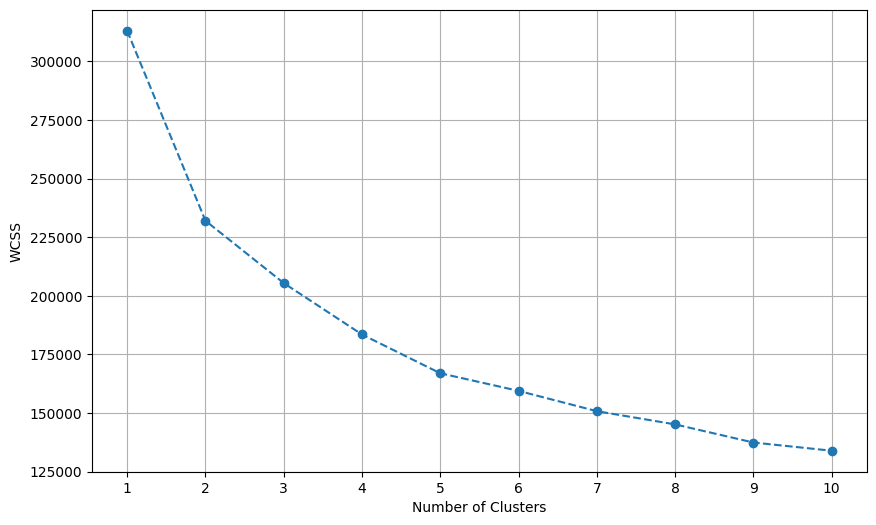

In [522]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
#plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [523]:
# Based on the elbow chart, select the optimal number of clusters (in this case, it's 2)
optimal_clusters = 2

In [524]:
#  KMeans cluster with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
kmeans.fit(features)

KMeans(n_clusters=2, random_state=42)

In [525]:
# Adding the cluster labels into the processed_data
processed_data['Clusters'] = kmeans.labels_

In [526]:
processed_data.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,...,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total contribution score,Brazil,England,France,Germany,Spain,Clusters
0,1,Spain,0,0,17,10,34,0.677836,0.166241,0.757061,...,0.922727,8,11,114.060946,0,0,0,0,1,0
1,2,France,0,1,14,13,31,0.544881,0.192774,0.796818,...,0.678984,3,8,110.908818,0,0,1,0,0,0
2,3,Germany,0,0,18,3,25,0.518180,0.160379,0.666869,...,0.843858,8,9,94.671852,0,0,0,1,0,0
3,4,France,1,0,22,9,20,0.599663,0.184602,0.638776,...,0.662997,6,8,124.865724,0,0,1,0,0,1
4,5,France,0,1,13,6,29,0.582982,0.105319,0.591485,...,0.906538,8,6,108.122356,0,0,1,0,0,0


In [527]:
average_total_contribution_score = processed_data.groupby('Clusters')['Total contribution score'].mean()
average_total_contribution_score

Clusters
0    102.350740
1    123.873526
Name: Total contribution score, dtype: float64

In [528]:
processed_data['Strikers types'] = processed_data['Clusters'].map({0: 'Best strikers', 1: 'Regular strikers'})
processed_data.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,...,Impact on Team Performance,Off-field Conduct,Total contribution score,Brazil,England,France,Germany,Spain,Clusters,Strikers types
0,1,Spain,0,0,17,10,34,0.677836,0.166241,0.757061,...,8,11,114.060946,0,0,0,0,1,0,Best strikers
1,2,France,0,1,14,13,31,0.544881,0.192774,0.796818,...,3,8,110.908818,0,0,1,0,0,0,Best strikers
2,3,Germany,0,0,18,3,25,0.518180,0.160379,0.666869,...,8,9,94.671852,0,0,0,1,0,0,Best strikers
3,4,France,1,0,22,9,20,0.599663,0.184602,0.638776,...,6,8,124.865724,0,0,1,0,0,1,Regular strikers
4,5,France,0,1,13,6,29,0.582982,0.105319,0.591485,...,8,6,108.122356,0,0,1,0,0,0,Best strikers


In [529]:
processed_data['Strikers types'] = processed_data['Strikers types'].map({'Best strikers': 1, 'Regular strikers': 0})
processed_data.head()


,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,...,Impact on Team Performance,Off-field Conduct,Total contribution score,Brazil,England,France,Germany,Spain,Clusters,Strikers types
0,1,Spain,0,0,17,10,34,0.677836,0.166241,0.757061,...,8,11,114.060946,0,0,0,0,1,0,1
1,2,France,0,1,14,13,31,0.544881,0.192774,0.796818,...,3,8,110.908818,0,0,1,0,0,0,1
2,3,Germany,0,0,18,3,25,0.518180,0.160379,0.666869,...,8,9,94.671852,0,0,0,1,0,0,1
3,4,France,1,0,22,9,20,0.599663,0.184602,0.638776,...,6,8,124.865724,0,0,1,0,0,1,0
4,5,France,0,1,13,6,29,0.582982,0.105319,0.591485,...,8,6,108.122356,0,0,1,0,0,0,1


In [530]:
# Drop unnecessary columns including 'Striker_ID'
x = processed_data.drop(['Striker_ID', 'Nationality'], axis=1)

# Target column
y = processed_data['Strikers types']


print("Features (x):")
print(x.head())
print("\nTarget (y):")
print(y.head())

Features (x):
   Footedness  Marital Status  Goals Scored  Assists  Shots on Target  \
0           0               0            17       10               34   
1           0               1            14       13               31   
2           0               0            18        3               25   
3           1               0            22        9               20   
4           0               1            13        6               29   

   Shot Accuracy  Conversion Rate  Dribbling Success  Movement off the Ball  \
0       0.677836         0.166241           0.757061                     50   
1       0.544881         0.192774           0.796818                     61   
2       0.518180         0.160379           0.666869                     65   
3       0.599663         0.184602           0.638776                     88   
4       0.582982         0.105319           0.591485                     75   

   Hold-up Play  ...  Impact on Team Performance  Off-field Conduct  \
0

In [531]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the features (x)
x_scaled = scaler.fit_transform(x)

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# Display the shapes of the train and test sets
print("Train set shape - x_train:", x_train.shape, " y_train:", y_train.shape)
print("Test set shape - x_test:", x_test.shape, " y_test:", y_test.shape)

Train set shape - x_train: (400, 25)  y_train: (400,)
Test set shape - x_test: (100, 25)  y_test: (100,)


In [533]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [534]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [548]:
 imputer = SimpleImputer(strategy='mean')
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)
logistic_reg = LogisticRegression()
logistic_reg.fit(x_train, y_train)

LogisticRegression()

In [549]:

y_pred = logistic_reg.predict(x_test)
y_pred

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1])

In [550]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


Confusion Matrix:
[[56  0]
 [ 0 44]]


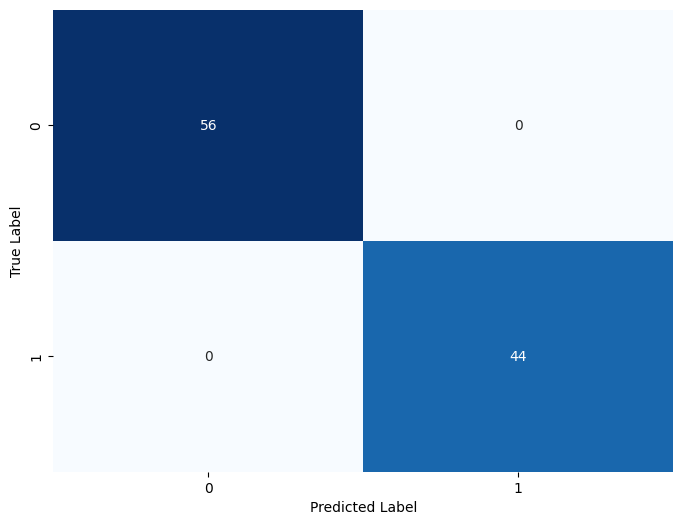

In [551]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
#plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()